In [1]:
# Essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
sns.set_style("whitegrid")


In [2]:
# Load OpenMV CSV
openmv = pd.read_csv("OpenMV_labels.csv")

# Quick check
openmv.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate
0,snapshot_201910831124745.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333"
1,snapshot_201910831124667.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333"
2,snapshot_201910831124823.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333"
3,snapshot_2019108311250252.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962334"
4,snapshot_2019108311251231.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962335"


In [3]:
# Remove brackets
openmv['COUNT'] = openmv['COUNT'].str.replace(r'[\[\]]', '', regex=True)

# Handle multiple counts separated by comma
# Sum the numbers if multiple values exist
def sum_counts(x):
    try:
        return sum([int(i.strip()) for i in x.split(',')])
    except:
        return 0

openmv['COUNT'] = openmv['COUNT'].apply(sum_counts)

# Convert to integer (safe now)
openmv['COUNT'] = openmv['COUNT'].astype(int)

# Check
openmv.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate
0,snapshot_201910831124745.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962333"
1,snapshot_201910831124667.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962333"
2,snapshot_201910831124823.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962333"
3,snapshot_2019108311250252.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962334"
4,snapshot_2019108311251231.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962335"


In [6]:
import pandas as pd

# Load the OpenMV CSV
openmv_clean = pd.read_csv("OpenMV_Labels.csv")

# Quick check
openmv_clean.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate
0,snapshot_201910831124745.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333"
1,snapshot_201910831124667.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333"
2,snapshot_201910831124823.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333"
3,snapshot_2019108311250252.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962334"
4,snapshot_2019108311251231.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962335"


In [7]:
# Step 0: Remove extra spaces
openmv_clean['x-y coordinate'] = openmv_clean['x-y coordinate'].str.strip()

# Step 1: Keep only first two numbers (latitude, longitude)
coords_split = openmv_clean['x-y coordinate'].str.split(',', n=1, expand=True)

# Step 2: Assign to new columns
openmv_clean['latitude'] = coords_split[0].astype(float)
openmv_clean['longitude'] = coords_split[1].astype(float)

# Step 3: Check first 5 rows
openmv_clean.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude
0,snapshot_201910831124745.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
1,snapshot_201910831124667.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
2,snapshot_201910831124823.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
3,snapshot_2019108311250252.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962334",-0.390381,36.962334
4,snapshot_2019108311251231.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962335",-0.390381,36.962335


In [8]:
# Step 1: Fix COUNT column
# Remove any brackets or extra spaces
openmv_clean["COUNT"] = openmv_clean["COUNT"].astype(str).str.replace(r"[\[\]\s]", "", regex=True)

# Sometimes there are multiple counts like '1,1'. We'll take the sum of all numbers in a cell
def sum_counts(x):
    try:
        return sum(int(i) for i in x.split(',') if i.isdigit())
    except:
        return 0

openmv_clean["COUNT"] = openmv_clean["COUNT"].apply(sum_counts)

# Check the first few rows
openmv_clean.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude
0,snapshot_201910831124745.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
1,snapshot_201910831124667.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
2,snapshot_201910831124823.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
3,snapshot_2019108311250252.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962334",-0.390381,36.962334
4,snapshot_2019108311251231.jpg,[IMPALA],1,[FEMALE],"-0.390381, 36.962335",-0.390381,36.962335


In [9]:
# Step 2: Species summary
species_summary = openmv_clean.groupby("SPECIES")["COUNT"].sum().reset_index()
species_summary = species_summary.sort_values(by="COUNT", ascending=False)
species_summary


,SPECIES,COUNT
4,[ZEBRA],242
1,[IMPALA],239
2,[WARTHOG],52
0,"[IMPALA, ZEBRA]",8
3,[WATERBUCK],4


In [10]:
# Step 3: Clean species column for summary
import pandas as pd

# Explode rows where multiple species are in one entry
openmv_clean_expanded = openmv_clean.copy()

# Split species where multiple species are listed
openmv_clean_expanded["SPECIES"] = openmv_clean_expanded["SPECIES"].str.replace("[\[\]]", "", regex=True)
openmv_clean_expanded["SPECIES"] = openmv_clean_expanded["SPECIES"].str.split(",")

# Expand to multiple rows if multiple species in one entry
openmv_clean_expanded = openmv_clean_expanded.explode("SPECIES")

# Remove extra spaces
openmv_clean_expanded["SPECIES"] = openmv_clean_expanded["SPECIES"].str.strip()

# Sum counts per species
species_summary = openmv_clean_expanded.groupby("SPECIES")["COUNT"].sum().sort_values(ascending=False)
print(species_summary)


SPECIES
ZEBRA        250
IMPALA       247
WARTHOG       52
WATERBUCK      4
Name: COUNT, dtype: int64


In [11]:
# Export species summary to CSV
species_summary.to_csv("species_summary_clean.csv", header=True)
print("Species summary exported successfully!")


Species summary exported successfully!


In [12]:
# Step 1: Expand SEX column if multiple entries per row
openmv_expanded = openmv_clean.copy()

# Split SEX column by commas and explode into separate rows
openmv_expanded['SEX'] = openmv_expanded['SEX'].str.split(',')
openmv_expanded = openmv_expanded.explode('SEX')
openmv_expanded['SEX'] = openmv_expanded['SEX'].str.strip()  # Remove extra spaces

# Step 2: Count species by sex
species_sex_counts = openmv_expanded.groupby(['SPECIES','SEX'])['COUNT'].sum().reset_index()

# Step 3: Display the result
species_sex_counts


,SPECIES,SEX,COUNT
0,"[IMPALA, ZEBRA]",CAN'T TELL],8
1,"[IMPALA, ZEBRA]",[FEMALE,8
2,[IMPALA],CAN'T TELL,6
3,[IMPALA],CAN'T TELL],27
4,[IMPALA],FEMALE,78
5,[IMPALA],FEMALE],75
6,[IMPALA],[CAN'T TELL],45
7,[IMPALA],[FEMALE,25
8,[IMPALA],[FEMALE],70
9,[IMPALA],[MALE,77


In [13]:
# Export Species × Sex summary to CSV
species_sex_counts.to_csv("species_sex_summary_clean.csv", index=False)
print("Species × Sex summary exported successfully!")


Species × Sex summary exported successfully!


In [14]:
# Step 4: Convert counts to percentages
# Calculate total count per species
species_totals = openmv_expanded.groupby('SPECIES')['COUNT'].sum().reset_index()
species_totals = species_totals.rename(columns={'COUNT':'TOTAL_COUNT'})

# Merge total count with species_sex_counts
species_sex_percent = species_sex_counts.merge(species_totals, on='SPECIES')

# Calculate percentage
species_sex_percent['PERCENTAGE'] = (species_sex_percent['COUNT'] / species_sex_percent['TOTAL_COUNT']) * 100

# Display
species_sex_percent


,SPECIES,SEX,COUNT,TOTAL_COUNT,PERCENTAGE
0,"[IMPALA, ZEBRA]",CAN'T TELL],8,16,50.000000
1,"[IMPALA, ZEBRA]",[FEMALE,8,16,50.000000
2,[IMPALA],CAN'T TELL,6,425,1.411765
3,[IMPALA],CAN'T TELL],27,425,6.352941
4,[IMPALA],FEMALE,78,425,18.352941
5,[IMPALA],FEMALE],75,425,17.647059
6,[IMPALA],[CAN'T TELL],45,425,10.588235
7,[IMPALA],[FEMALE,25,425,5.882353
8,[IMPALA],[FEMALE],70,425,16.470588
9,[IMPALA],[MALE,77,425,18.117647


In [15]:
# Export Species × Sex percentages to CSV
species_sex_percent.to_csv("species_sex_percentages_clean.csv", index=False)
print("Species × Sex percentages exported successfully!")


Species × Sex percentages exported successfully!


In [17]:
import os
os.getcwd()


'C:\\Users\\Ankan\\Documents\\python_projects'

In [18]:
os.listdir()


['.ipynb_checkpoints',
 'CameraTrap_Analysis.ipynb',
 'OpenMV_labels.csv',
 'RaspberryPi_labels.csv',
 'species_sex_percentages_clean.csv',
 'species_sex_summary_clean.csv',
 'species_summary_clean.csv']

<Figure size 1000x600 with 0 Axes>

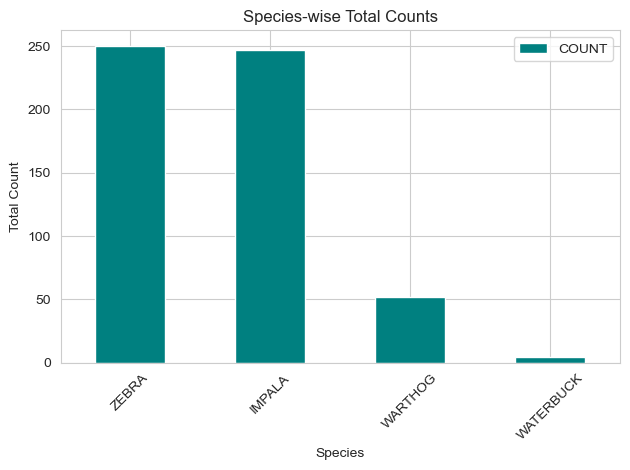

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned summary CSV
species_summary = pd.read_csv("species_summary_clean.csv", index_col=0)

# Plot Species-wise Total Counts
plt.figure(figsize=(10,6))
species_summary.plot(kind="bar", color="teal")
plt.xlabel("Species")
plt.ylabel("Total Count")
plt.title("Species-wise Total Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

# Load the CSV
sex_summary = pd.read_csv("species_sex_summary_clean.csv", index_col=0)

# Check the columns
print(sex_summary.columns)


Index(['SEX', 'COUNT'], dtype='object')


In [24]:
# Remove square brackets from SPECIES and SEX
openmv_clean["SPECIES"] = openmv_clean["SPECIES"].str.replace(r"[\[\]]", "", regex=True)
openmv_clean["SEX"] = openmv_clean["SEX"].str.replace(r"[\[\]]", "", regex=True)

# Check result
openmv_clean[["SPECIES", "SEX"]].head()


,SPECIES,SEX
0,IMPALA,FEMALE
1,IMPALA,FEMALE
2,IMPALA,FEMALE
3,IMPALA,FEMALE
4,IMPALA,FEMALE


In [25]:
species_sex_summary = (
    openmv_clean
    .groupby(["SPECIES", "SEX"])["COUNT"]
    .sum()
    .reset_index()
)

species_sex_summary


,SPECIES,SEX,COUNT
0,IMPALA,CAN'T TELL,45
1,IMPALA,FEMALE,70
2,IMPALA,"FEMALE,CAN'T TELL",4
3,IMPALA,"FEMALE,CAN'T TELL,CAN'T TELL",6
4,IMPALA,"FEMALE,FEMALE,CAN'T TELL",15
5,IMPALA,MALE,22
6,IMPALA,"MALE,CAN'T TELL",2
7,IMPALA,"MALE,FEMALE",36
8,IMPALA,"MALE,FEMALE,FEMALE",15
9,IMPALA,"MALE,FEMALE,FEMALE,FEMALE",24


In [26]:
species_sex_summary.to_csv("species_sex_summary_clean.csv", index=False)


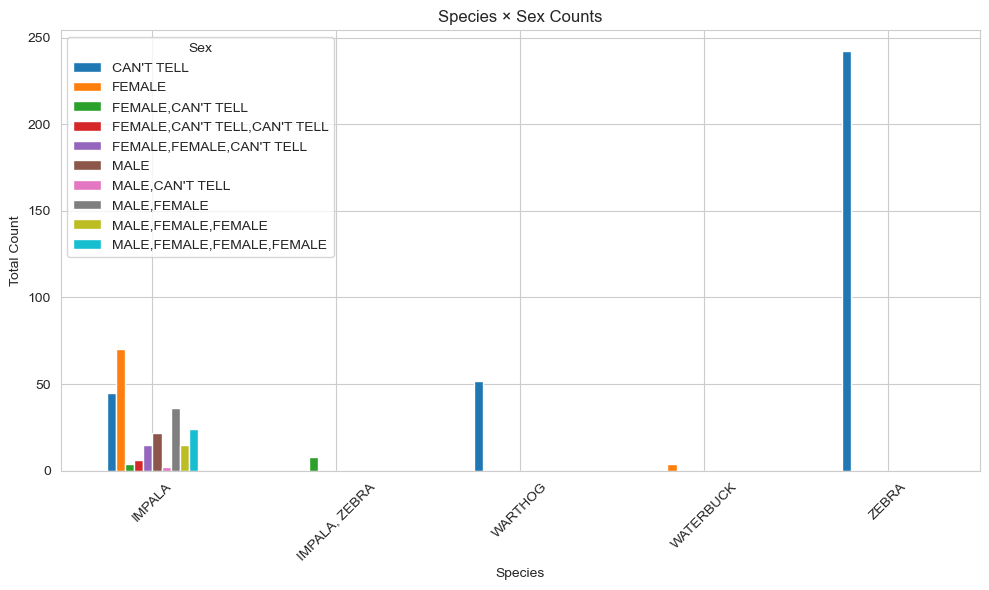

In [27]:
import matplotlib.pyplot as plt

# Pivot table for plotting
pivot_counts = species_sex_summary.pivot(
    index="SPECIES",
    columns="SEX",
    values="COUNT"
).fillna(0)

# Plot
pivot_counts.plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Species × Sex Counts")
plt.xlabel("Species")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


In [28]:
# Convert counts to percentages per species
species_sex_percent = species_sex_summary.copy()

species_sex_percent["PERCENTAGE"] = (
    species_sex_percent
    .groupby("SPECIES")["COUNT"]
    .transform(lambda x: (x / x.sum()) * 100)
)

species_sex_percent


,SPECIES,SEX,COUNT,PERCENTAGE
0,IMPALA,CAN'T TELL,45,18.828452
1,IMPALA,FEMALE,70,29.288703
2,IMPALA,"FEMALE,CAN'T TELL",4,1.673640
3,IMPALA,"FEMALE,CAN'T TELL,CAN'T TELL",6,2.510460
4,IMPALA,"FEMALE,FEMALE,CAN'T TELL",15,6.276151
5,IMPALA,MALE,22,9.205021
6,IMPALA,"MALE,CAN'T TELL",2,0.836820
7,IMPALA,"MALE,FEMALE",36,15.062762
8,IMPALA,"MALE,FEMALE,FEMALE",15,6.276151
9,IMPALA,"MALE,FEMALE,FEMALE,FEMALE",24,10.041841


In [29]:
species_sex_percent.to_csv("species_sex_percentages_clean.csv", index=False)


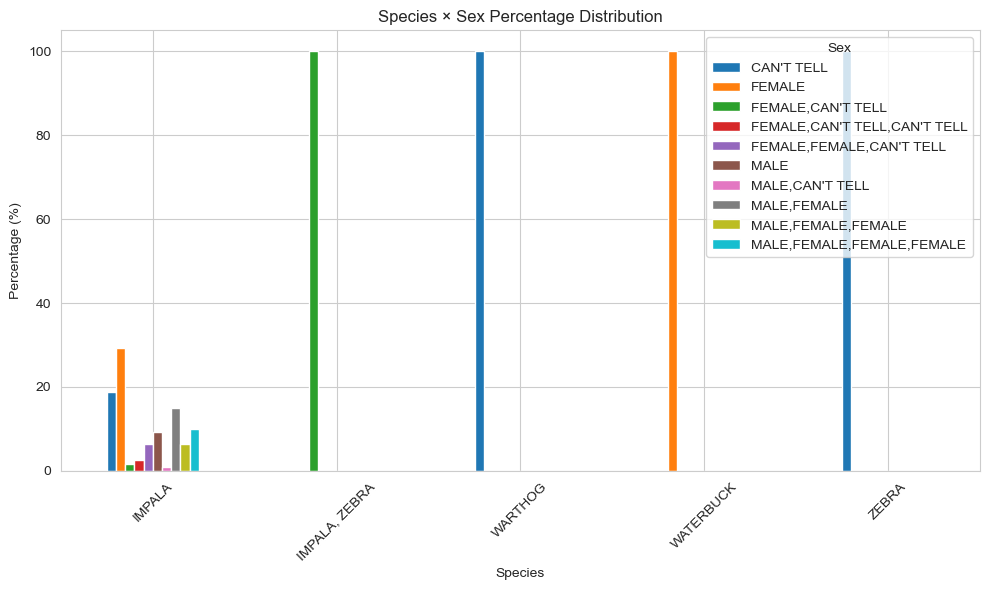

In [30]:
import matplotlib.pyplot as plt

# Pivot for percentage plot
pivot_percent = species_sex_percent.pivot(
    index="SPECIES",
    columns="SEX",
    values="PERCENTAGE"
).fillna(0)

# Plot
pivot_percent.plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Species × Sex Percentage Distribution")
plt.xlabel("Species")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


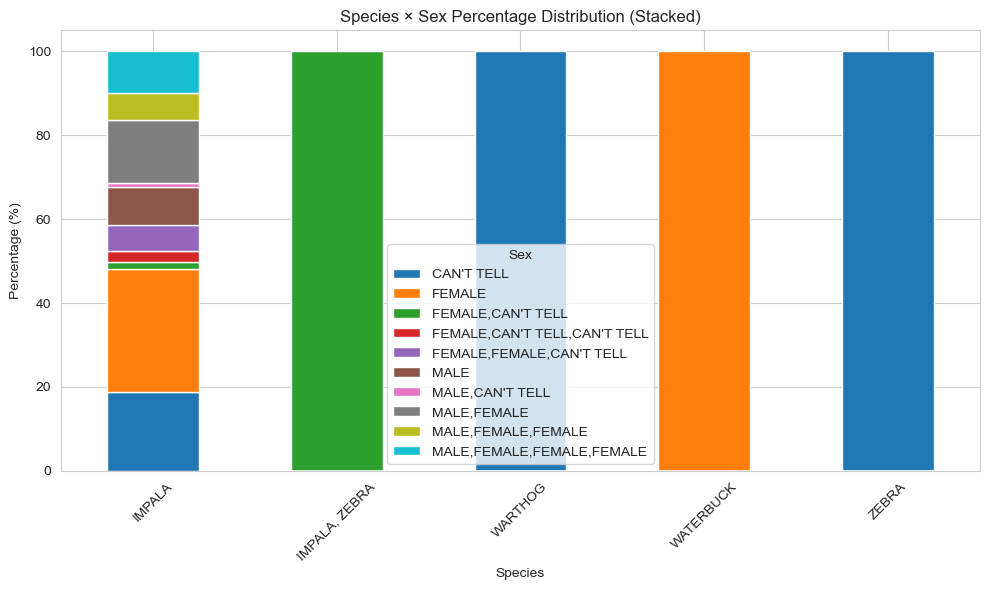

In [31]:
import matplotlib.pyplot as plt

# Use the percentage pivot table we already created
pivot_percent = species_sex_percent.pivot(
    index="SPECIES",
    columns="SEX",
    values="PERCENTAGE"
).fillna(0)

# Stacked bar plot
pivot_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Species × Sex Percentage Distribution (Stacked)")
plt.xlabel("Species")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

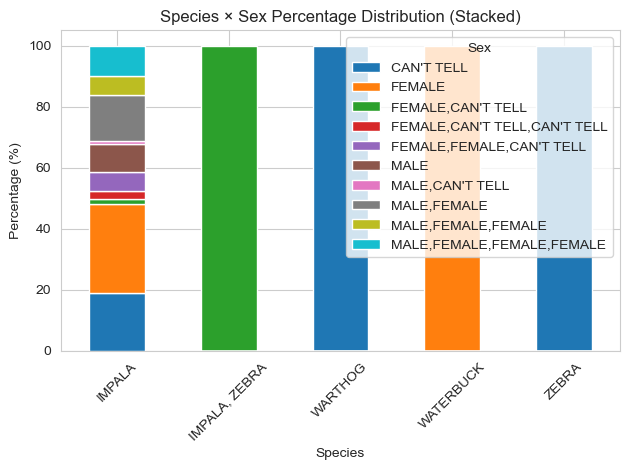

In [32]:
plt.figure(figsize=(10,6))
pivot_percent.plot(kind="bar", stacked=True)
plt.title("Species × Sex Percentage Distribution (Stacked)")
plt.xlabel("Species")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.savefig("species_sex_percentage_stacked.png", dpi=300)
plt.show()


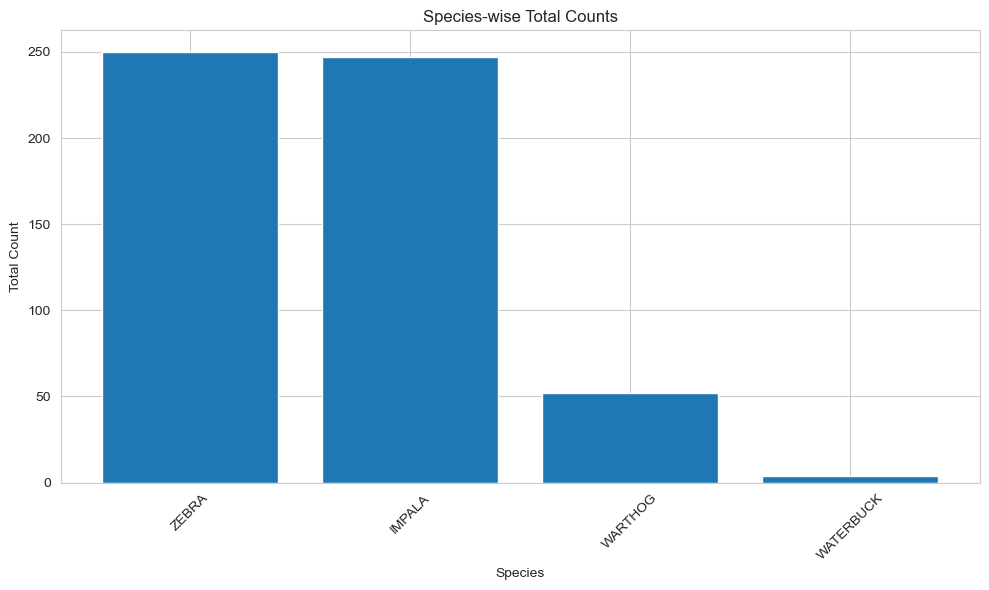

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load species summary
species_summary = pd.read_csv("species_summary_clean.csv")

plt.figure(figsize=(10,6))
plt.bar(
    species_summary["SPECIES"],
    species_summary["COUNT"]
)

plt.title("Species-wise Total Counts")
plt.xlabel("Species")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Save PNG
plt.savefig("species_total_counts.png", dpi=300)
plt.show()


<Figure size 1000x600 with 0 Axes>

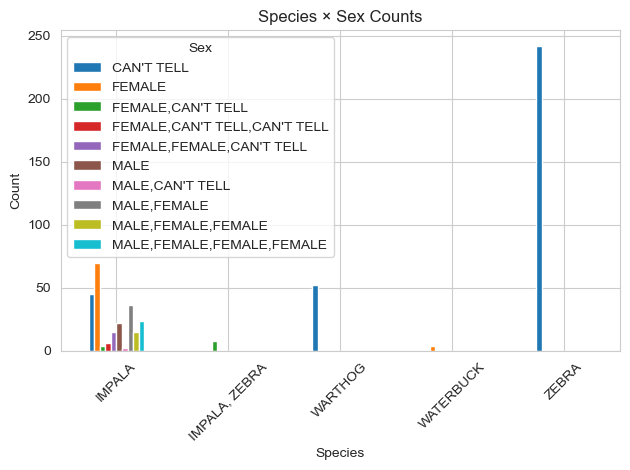

In [34]:
# Load sex summary
species_sex_summary = pd.read_csv("species_sex_summary_clean.csv")

# Pivot for plotting
pivot_counts = species_sex_summary.pivot(
    index="SPECIES",
    columns="SEX",
    values="COUNT"
).fillna(0)

plt.figure(figsize=(10,6))
pivot_counts.plot(kind="bar")

plt.title("Species × Sex Counts")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()

# Save PNG
plt.savefig("species_sex_counts.png", dpi=300)
plt.show()


<Figure size 1000x600 with 0 Axes>

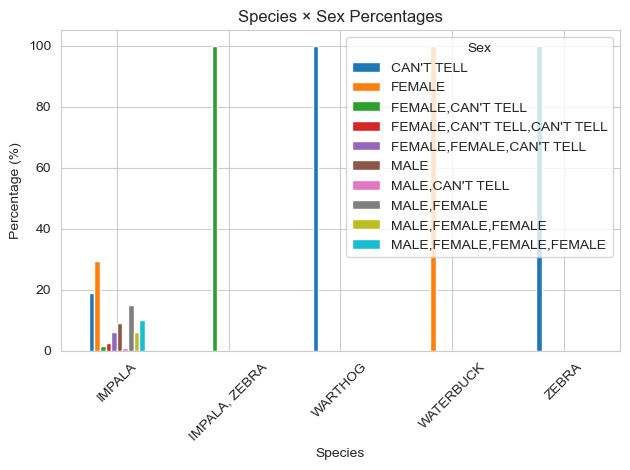

In [35]:
# Load percentage summary
species_sex_percent = pd.read_csv("species_sex_percentages_clean.csv")

# Pivot for plotting
pivot_percent = species_sex_percent.pivot(
    index="SPECIES",
    columns="SEX",
    values="PERCENTAGE"
).fillna(0)

plt.figure(figsize=(10,6))
pivot_percent.plot(kind="bar")

plt.title("Species × Sex Percentages")
plt.xlabel("Species")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()

# Save PNG
plt.savefig("species_sex_percentages.png", dpi=300)
plt.show()


<Figure size 1000x600 with 0 Axes>

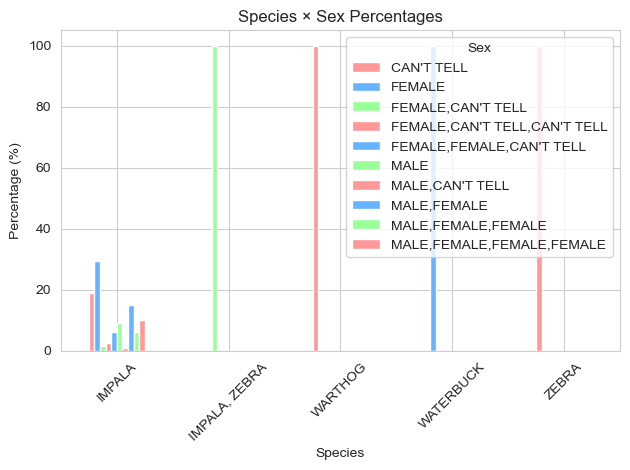

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load percentage data
percent_df = pd.read_csv("species_sex_percentages_clean.csv")

# Pivot table
pivot_percent = percent_df.pivot(
    index="SPECIES",
    columns="SEX",
    values="PERCENTAGE"
).fillna(0)

# Plot
plt.figure(figsize=(10,6))
pivot_percent.plot(
    kind="bar",
    color=["#ff9999", "#66b3ff", "#99ff99"]  # FEMALE, MALE, CAN'T TELL
)

plt.title("Species × Sex Percentages")
plt.xlabel("Species")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()

# Save PNG
plt.savefig("species_sex_percentages_colored.png", dpi=300)
plt.show()


<Figure size 1000x600 with 0 Axes>

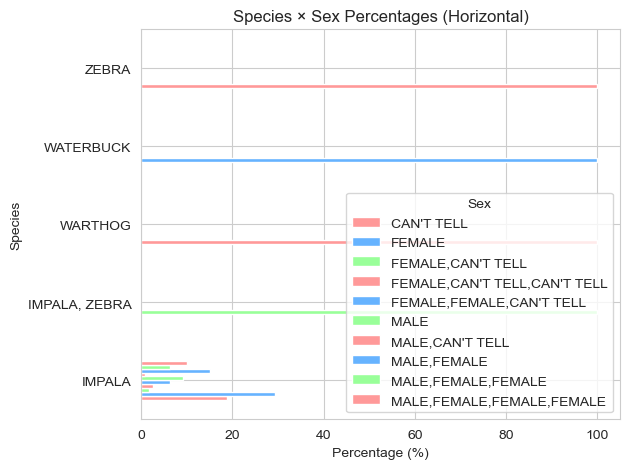

In [37]:
plt.figure(figsize=(10,6))

pivot_percent.plot(
    kind="barh",
    color=["#ff9999", "#66b3ff", "#99ff99"]
)

plt.title("Species × Sex Percentages (Horizontal)")
plt.xlabel("Percentage (%)")
plt.ylabel("Species")
plt.legend(title="Sex")
plt.tight_layout()

# Save PNG
plt.savefig("species_sex_percentages_horizontal.png", dpi=300)
plt.show()


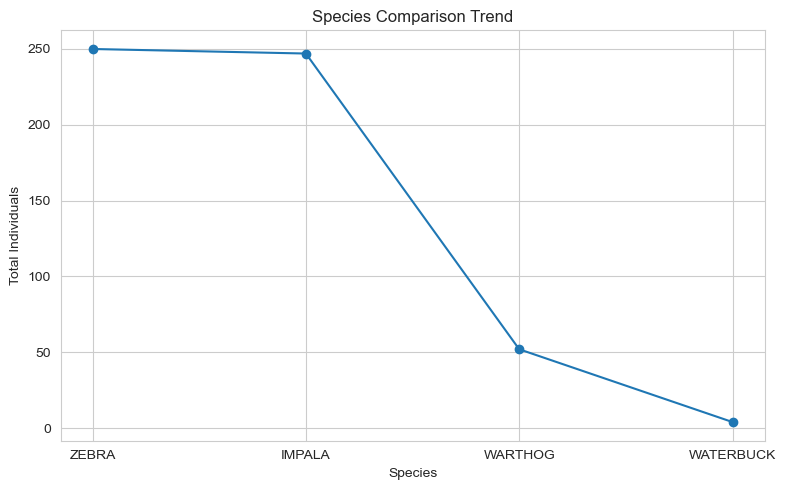

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load species summary
species_df = pd.read_csv("species_summary_clean.csv")

plt.figure(figsize=(8,5))
plt.plot(
    species_df["SPECIES"],
    species_df["COUNT"],
    marker="o",
    linestyle="-"
)

plt.title("Species Comparison Trend")
plt.xlabel("Species")
plt.ylabel("Total Individuals")
plt.grid(True)
plt.tight_layout()

# Save PNG
plt.savefig("species_comparison_trend.png", dpi=300)
plt.show()


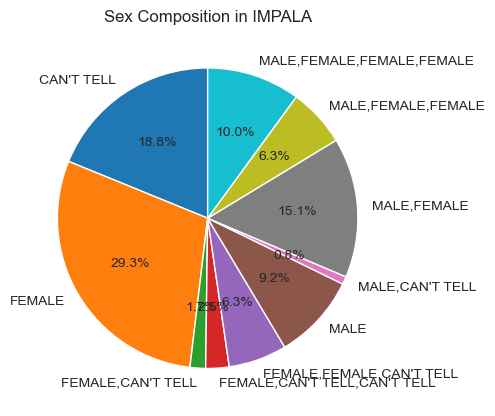

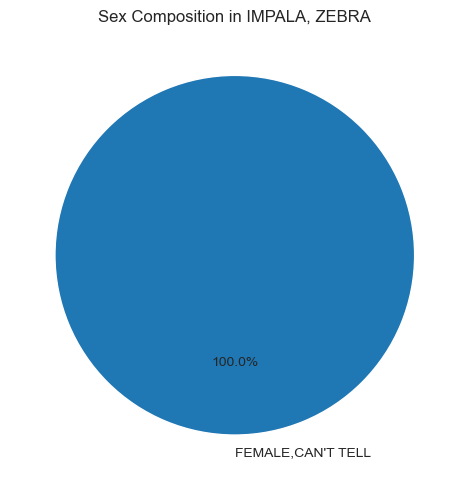

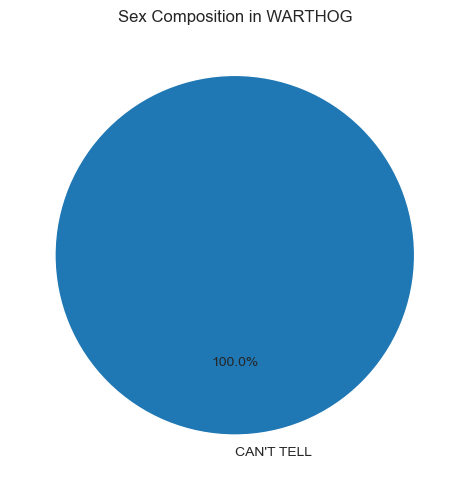

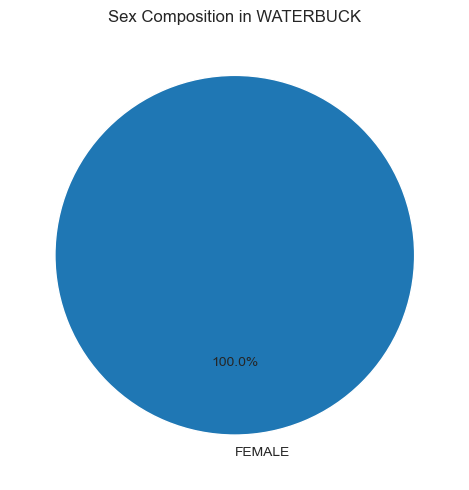

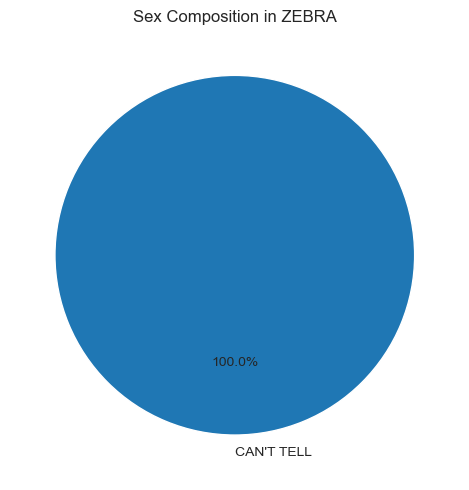

In [39]:
sex_percent = pd.read_csv("species_sex_percentages_clean.csv")

species_list = sex_percent["SPECIES"].unique()

for sp in species_list:
    subset = sex_percent[sex_percent["SPECIES"] == sp]

    plt.figure(figsize=(5,5))
    plt.pie(
        subset["PERCENTAGE"],
        labels=subset["SEX"],
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(f"Sex Composition in {sp}")
    plt.tight_layout()

    # Save PNG per species
    plt.savefig(f"pie_sex_{sp.lower()}.png", dpi=300)
    plt.show()


In [42]:
openmv_clean.columns


Index(['FILENAME', 'SPECIES', 'COUNT', 'SEX', 'x-y coordinate'], dtype='object')

In [43]:
# Split x-y coordinate into latitude and longitude
coords = openmv_clean["x-y coordinate"].str.split(",", expand=True)

openmv_clean["latitude"] = coords[0].astype(float)
openmv_clean["longitude"] = coords[1].astype(float)

openmv_clean[["latitude", "longitude"]].head()


,latitude,longitude
0,-0.390381,36.962333
1,-0.390381,36.962333
2,-0.390381,36.962333
3,-0.390381,36.962334
4,-0.390381,36.962335


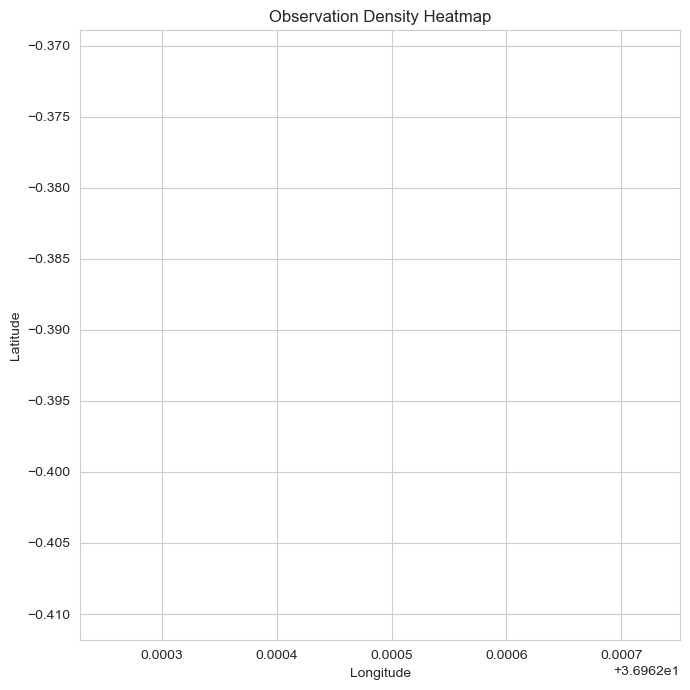

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
sns.kdeplot(
    x=openmv_clean["longitude"],
    y=openmv_clean["latitude"],
    fill=True,
    cmap="Reds",
    thresh=0.05
)

plt.title("Observation Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.savefig("camera_trap_density_heatmap.png", dpi=300)
plt.show()


In [45]:
openmv_clean.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude
0,snapshot_201910831124745.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
1,snapshot_201910831124667.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
2,snapshot_201910831124823.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962333",-0.390381,36.962333
3,snapshot_2019108311250252.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962334",-0.390381,36.962334
4,snapshot_2019108311251231.jpg,[IMPALA],[1],[FEMALE],"-0.390381, 36.962335",-0.390381,36.962335


In [46]:
import pandas as pd

# Make a working copy (safe practice)
openmv_final = openmv_clean.copy()

# ---------- FIX COUNT ----------
# Remove brackets and spaces
openmv_final["COUNT"] = (
    openmv_final["COUNT"]
    .astype(str)
    .str.replace(r"[\[\]]", "", regex=True)
    .str.strip()
)

# Handle cases like "1, 1" → take first value
openmv_final["COUNT"] = openmv_final["COUNT"].str.split(",").str[0]

# Convert to integer
openmv_final["COUNT"] = openmv_final["COUNT"].astype(int)

# ---------- FIX SPECIES ----------
openmv_final["SPECIES"] = (
    openmv_final["SPECIES"]
    .astype(str)
    .str.replace(r"[\[\]]", "", regex=True)
    .str.strip()
)

# ---------- FIX SEX ----------
openmv_final["SEX"] = (
    openmv_final["SEX"]
    .astype(str)
    .str.replace(r"[\[\]]", "", regex=True)
    .str.strip()
)

# Quick check
openmv_final.info()
openmv_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FILENAME        325 non-null    object 
 1   SPECIES         325 non-null    object 
 2   COUNT           325 non-null    int64  
 3   SEX             325 non-null    object 
 4   x-y coordinate  325 non-null    object 
 5   latitude        325 non-null    float64
 6   longitude       325 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 17.9+ KB


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude
0,snapshot_201910831124745.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333
1,snapshot_201910831124667.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333
2,snapshot_201910831124823.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333
3,snapshot_2019108311250252.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962334",-0.390381,36.962334
4,snapshot_2019108311251231.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962335",-0.390381,36.962335


In [47]:
openmv_final.to_csv("camera_trap_cleaned.csv", index=False)
print("Saved: camera_trap_cleaned.csv")


Saved: camera_trap_cleaned.csv


In [48]:
camera_trap_points = openmv_final.drop(columns=["x-y coordinate"])

camera_trap_points.to_csv("camera_trap_points_clean.csv", index=False)
print("Saved: camera_trap_points_clean.csv")


Saved: camera_trap_points_clean.csv
